In [35]:
import pandas as pd
#read multiple tables
ds1 = pd.read_csv('Auto_Insurance_Claims_Sample.csv')
ds2 = pd.read_csv('CPI_2011.csv')
ds3 = pd.read_csv('GDP.csv')
ds4 = pd.read_csv('Total_Fatalities_2010-2011.csv')

In [36]:
#merge tables based on states
ds_1 = pd.merge(ds1, ds2, on = 'State')
ds_2 = pd.merge(ds_1, ds3, on = 'State')
ds = pd.merge(ds_2, ds4, on = 'State')
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [37]:
#drop unnecessary(duplicated) colums: Total_Fatalities_2010,Total_Fatalities_Change, and Total_Fatalities_% Change
ds = ds.drop(['Effective To Date', 'Total_Fatalities_2010', 'Total_Fatalities_Change', 'Total_Fatalities_% Change'], axis=1)

In [38]:
#create dummy variables for columns, such as 'State', 'Coverage', 'EmploymentStatus', 'Sales Channel'.....
dummy_ds = pd.get_dummies(ds[['State','Response','Coverage', 'Education','EmploymentStatus',
                              'Gender','Location Code', 'Marital Status', 'Policy Type',
                             'Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size']])
#concatenate the original dataframe and the dummy variables
ds = pd.concat([ds,dummy_ds], axis=1)
print(ds)

     Customer Country State Code   State  Claim Amount Response  Coverage  \
0     BU79786      US         KS  Kansas    276.351928       No     Basic   
1     HB64268      US         KS  Kansas    281.369258       No     Basic   
2     SV62436      US         KS  Kansas    304.179156       No  Extended   
3     HO30839      US         KS  Kansas    534.691658       No  Extended   
4     AO98601      US         KS  Kansas    501.888523       No     Basic   
...       ...     ...        ...     ...           ...      ...       ...   
9129  QL80621      US         IA    Iowa    224.987480       No     Basic   
9130  LC47479      US         IA    Iowa   2862.231443       No  Extended   
9131  VQ78876      US         IA    Iowa    466.039957       No     Basic   
9132  JD86991      US         IA    Iowa    509.731866       No     Basic   
9133  QM60216      US         IA    Iowa    890.699143       No  Extended   

     Education EmploymentStatus Gender  ...  Sales Channel_Web  \
0     Bac

In [39]:
#ds.info()
#drop duplicated colums, ones that get dummy variables
ds = ds.drop(['State Code','Response','Coverage', 'Education','EmploymentStatus',
                              'Gender','Location Code', 'Marital Status', 'Policy Type',
                             'Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size'], axis=1)

In [51]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer                        9134 non-null   object 
 1   Country                         9134 non-null   object 
 2   State                           9134 non-null   object 
 3   Claim Amount                    9134 non-null   float64
 4   Income                          9134 non-null   int64  
 5   Monthly Premium Auto            9134 non-null   int64  
 6   Months Since Last Claim         9134 non-null   int64  
 7   Months Since Policy Inception   9134 non-null   int64  
 8   Number of Open Complaints       9134 non-null   int64  
 9   Number of Policies              9134 non-null   int64  
 10  Total Claim Amount              9134 non-null   float64
 11  CPI                             9134 non-null   float64
 12  GDP                             91

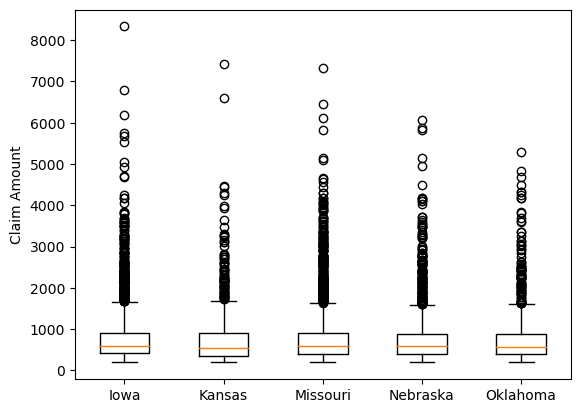

In [65]:
import matplotlib.pyplot as plt
import numpy as np

#State_Iowa = ds.loc(ds['State_Iowa']==1,'Claim Amount').values
#State_Kansas = ds.loc(ds['State_Kansas']==1,'Claim Amount').values
#State_Missouri = ds.loc(ds['State_Missouri']==1,'Claim Amount').values
#State_Nebraska = ds.loc(ds['State_Nebraska']==1,'Claim Amount').values
#State_Oklahoma = ds.loc(ds['State_Oklahoma']==1,'Claim Amount').values

#plt.boxplot([State_Iowa, State_Kansas, State_Missouri, State_Nebraska, State_Oklahoma],
#            labels=['Iowa', 'Kansas', 'Missouri', 'Nebraska', 'Oklahoma'])

#not working
#dsa = ['Claim Amount','State_Iowa', 'State_Kansas', 'State_Missouri', 'State_Nebraska', 'State_Oklahoma']
#bp =[]
#for d in dsa:
#    i=ds[d].values
#    bp.append(i)
#ds1,ds2,ds3,ds4,ds5,ds6 = bp
#plt.boxplot([ds1,ds2,ds3,ds4,ds5,ds6], labels=dsa)
#plt.figure(figsize=(20,15))
#plt.boxplot([ds1,ds2,ds3,ds4,ds5,ds6], labels=dsa)
#plt.semilogy()

grouped_data = ds[['State','Claim Amount']].groupby('State')
states = []
claims = []
for state, group in grouped_data:
    states.append(state)
    claims.append(group['Claim Amount'].tolist())
    
plt.boxplot(claims)

# set x-axis labels to states
plt.xticks(range(1, len(states) + 1), states)

# set y-axis label
plt.ylabel('Claim Amount')

# display the plot
plt.show()

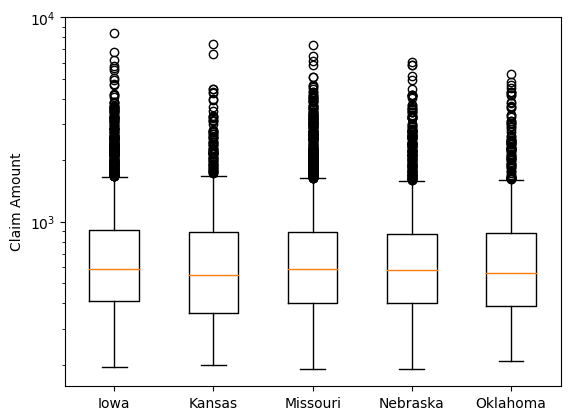

In [69]:
grouped_data = ds[['State','Claim Amount']].groupby('State')
states = []
claims = []
for state, group in grouped_data:
    states.append(state)
    claims.append(group['Claim Amount'].tolist())
    
plt.boxplot(claims)
plt.xticks(range(1, len(states) + 1), states)
plt.ylabel('Claim Amount')
#scale
plt.yscale('log')
plt.show()

[]

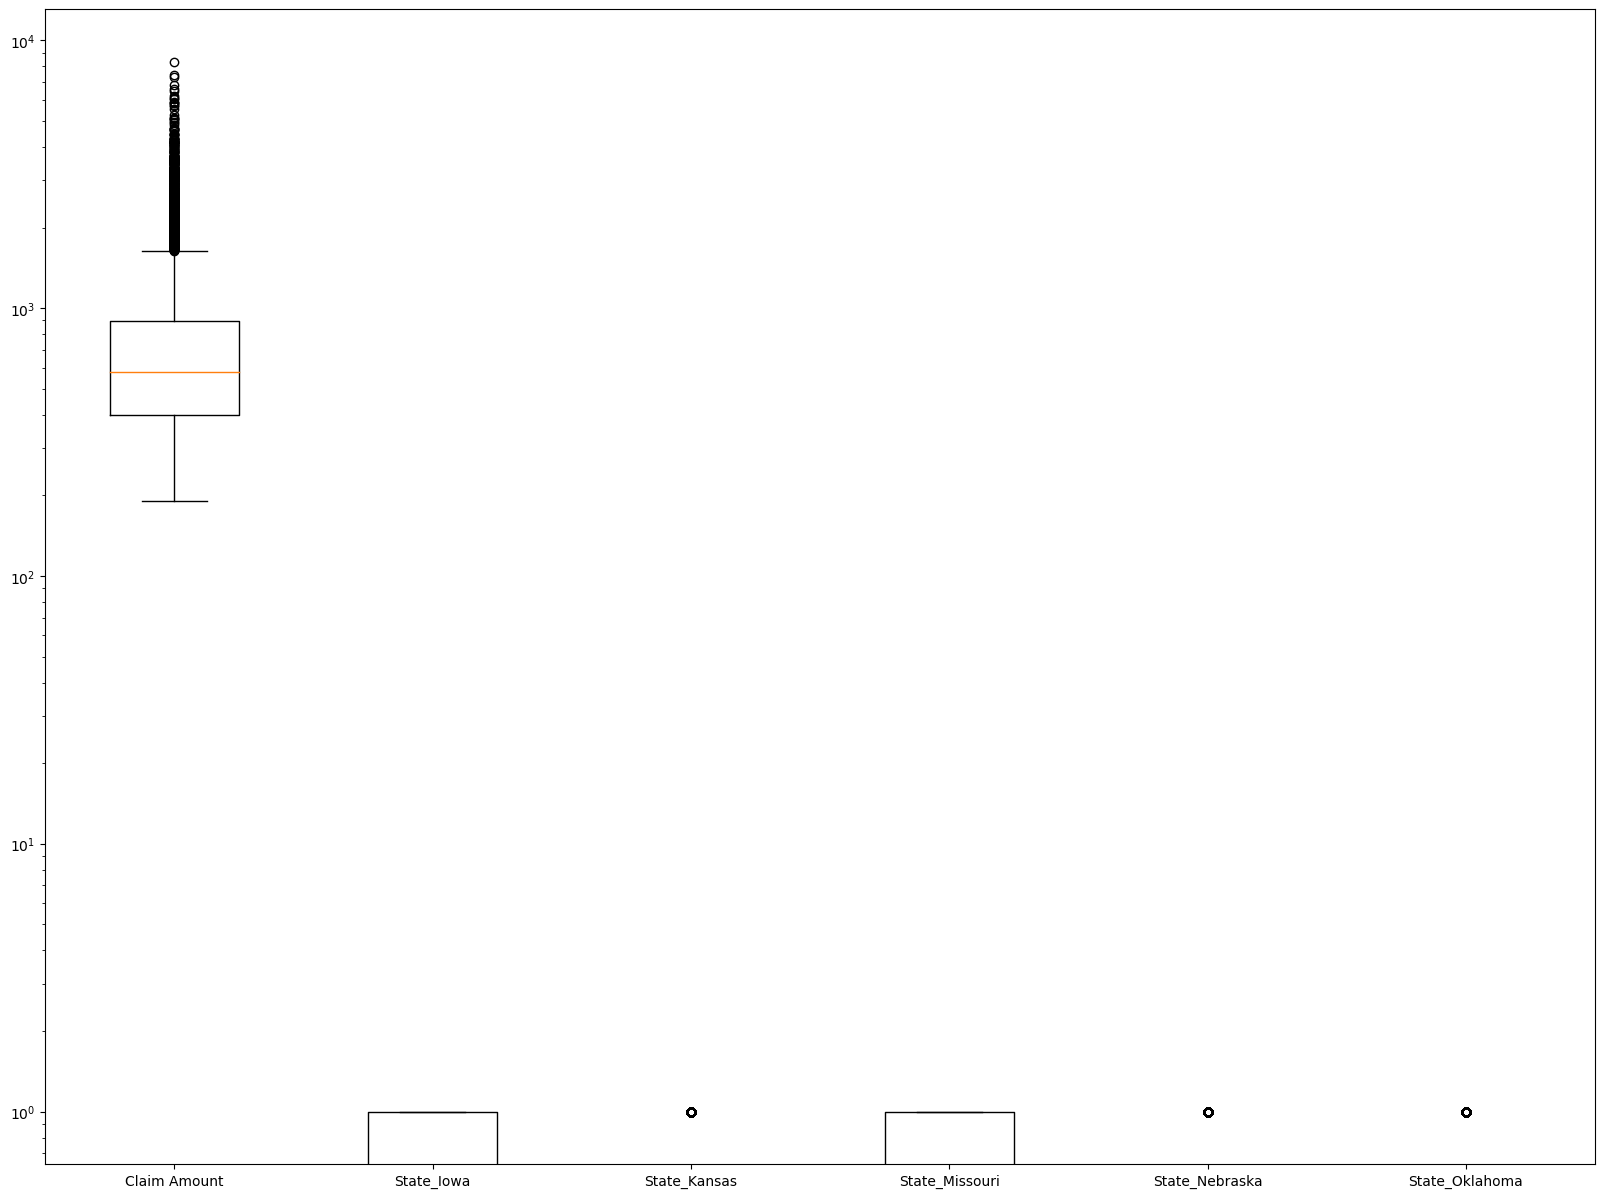